### Problem Statement
<p>
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. <br /><br />-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks(BB), Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors
<br /><br />
-- Output: Number of predicted wins (W)
    <br /><br /></p> 
Dataset Link : <a href = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv">https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv </a>

##### Note: Column CG's description is not mentioned

### Code starts from here......

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Major_League_Baseball_2014_data  = pd.read_csv(
    'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
Major_League_Baseball_2014_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# creating a copy for original dataframe
baseball_2014 = Major_League_Baseball_2014_data.copy()
baseball_2014.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
baseball_2014.shape

(30, 17)

##### So, the data has 30 rows and 17 columns

In [5]:
baseball_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


##### data type for all the columns is integer and float which seems fine. No need to change any data type
##### also there are no null values

In [6]:
baseball_2014.isnull().sum() # cross checking the null values in the data

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
baseball_2014.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


##### - For all the features/columns, mean is almost equal to median that means Data is almost symmetric about the mean</li>
    

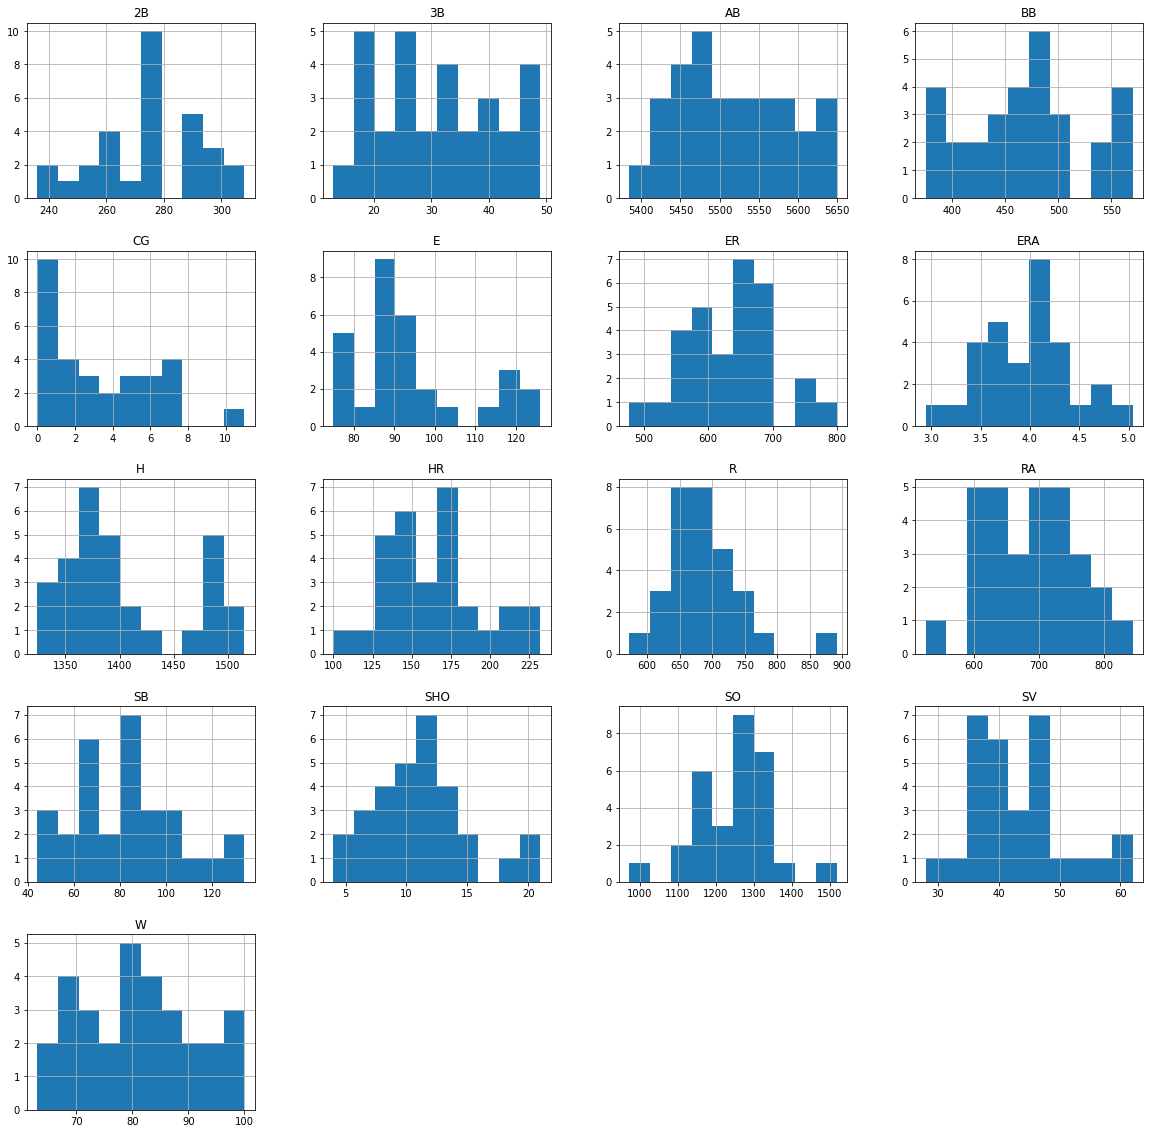

In [8]:
# Plotting a histogram to check the distribution of all the variables/columns
baseball_2014.hist(bins=10,figsize = (20,20))
plt.show()

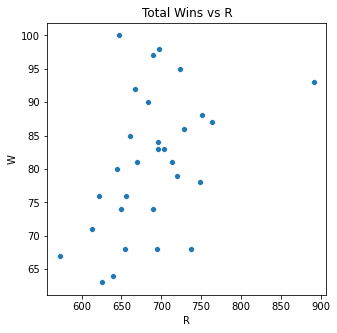

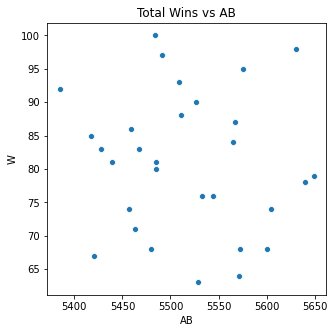

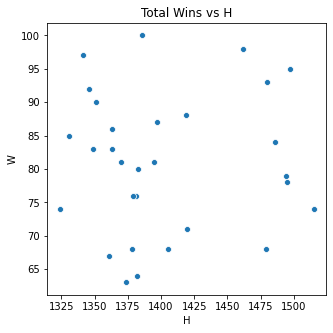

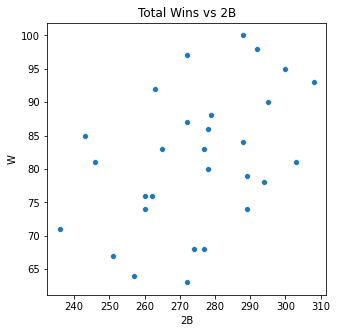

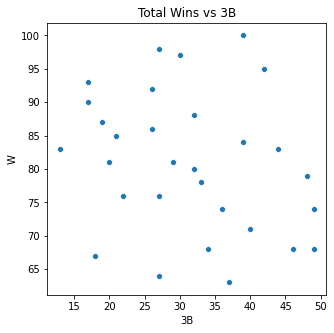

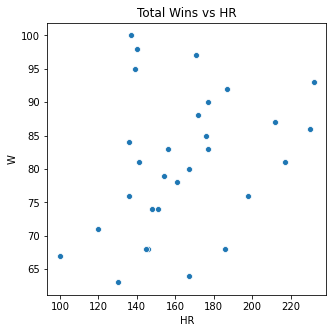

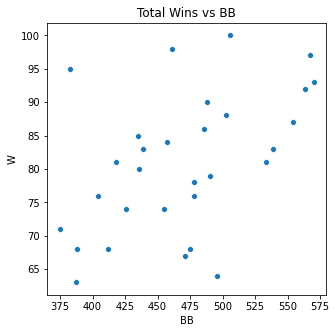

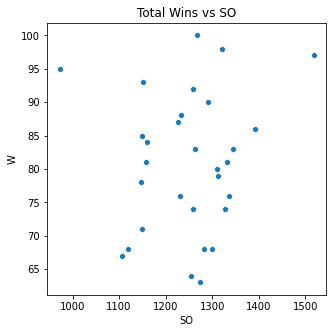

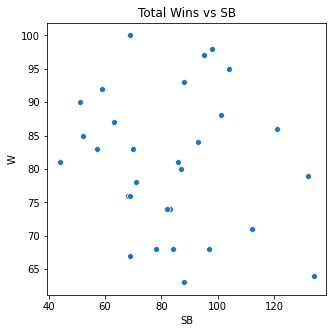

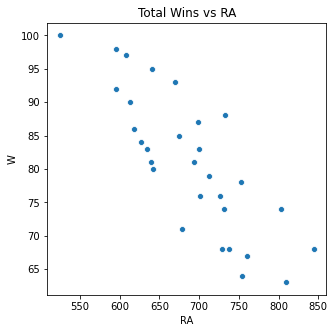

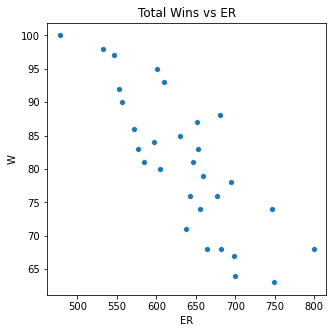

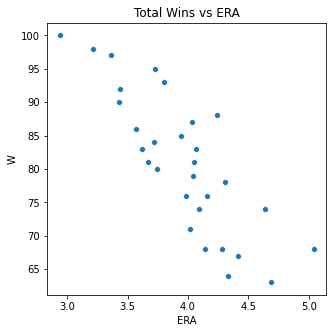

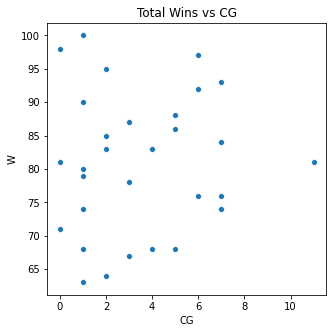

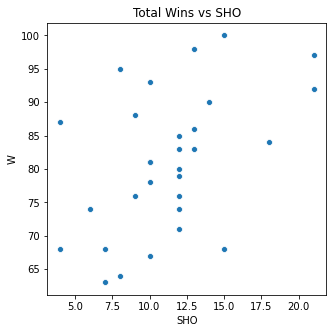

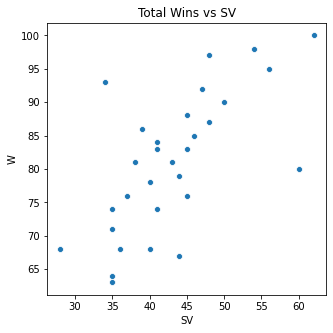

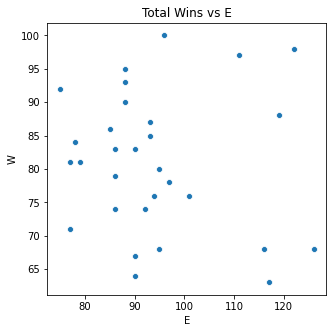

In [9]:
for cols in baseball_2014.columns[1:]:
    #print(cols)
    plt.figure(figsize=(5, 5))
    ax = sns.scatterplot(x= "{0}".format(cols), y = baseball_2014['W'] , data=baseball_2014)
    ax.set(title="Total Wins vs {0}".format(cols))
    

Since, data is very less but based on the available data my inferences are:
<ul>
    <li>Total Wins (W) has some +ve relation with "R", "2B", "SO", "SV", </li>
    <li>Total Wins (W) has some -ve relation with "3B","SB", "AB", "RA", "ER", "ERA", </li>
    <li>For the rest of the features, data is very shattered so it very difficult to make any inference</li>

##### - From the histogram plot it is quite evident that data is not following the Normal distribution, so we need to convert our data into Normal distribution


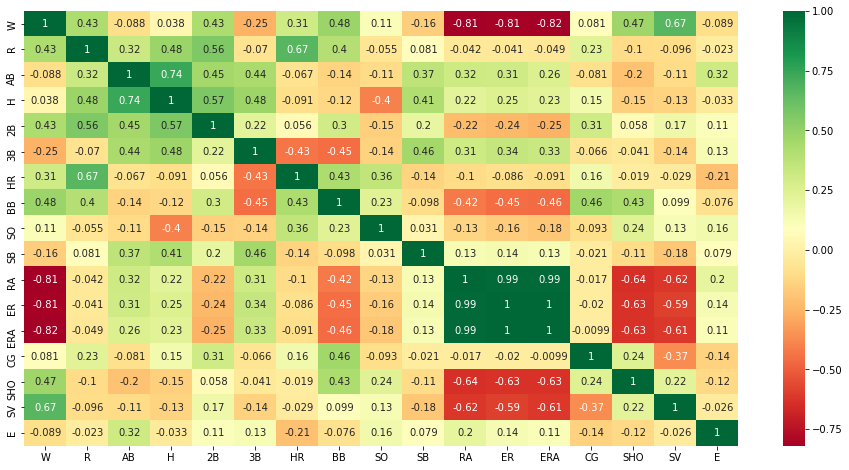

In [10]:
plt.figure(figsize = (16,8))
sns.heatmap(baseball_2014.corr(),annot=True,cmap ='RdYlGn')

#### Inferences made from the correlation matrix
<ul>
    <li>ERA and ER have 100% correlation with each other and also, both have 99% correlation with RA. So, I will remove ER and RA as they have 81% correaltion with feature target i.e W whereas ERA has 82% correlation</li>
    <li>Further, AB, H, SO, SB, CG and E have less than 10% correlation with W. So, we can also think to remove these features. But, as we have very less data so currently I will not remove them</li>


In [13]:
baseball_2014.drop(baseball_2014[['ER','RA']], axis=1, inplace=True)
baseball_2014.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [14]:
# creating a seperate output/target variable column
y = baseball_2014.iloc[:,:1]
y.head()

,W
0,95
1,83
2,81
3,76
4,74


In [15]:
# creating a seperate dataframe for all the independent variables
X = baseball_2014.iloc[:,1:]
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


In [16]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape,X_test.shape)

(20, 14) (10, 14)


In [17]:
X_train.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
16,697,5631,1462,292,27,140,461,1322,98,3.21,0,13,54,122
5,891,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
13,656,5544,1379,262,22,198,478,1336,69,4.16,6,12,45,94
11,729,5459,1363,278,26,230,486,1392,121,3.57,5,13,39,85


In [18]:
X_test.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
27,720,5649,1494,289,48,154,490,1312,132,4.04,1,12,44,86
15,647,5484,1386,288,39,137,506,1267,69,2.94,1,15,62,96
23,573,5420,1361,251,18,100,471,1107,69,4.41,3,10,44,90
17,689,5491,1341,272,30,171,567,1518,95,3.36,6,21,48,111
8,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95


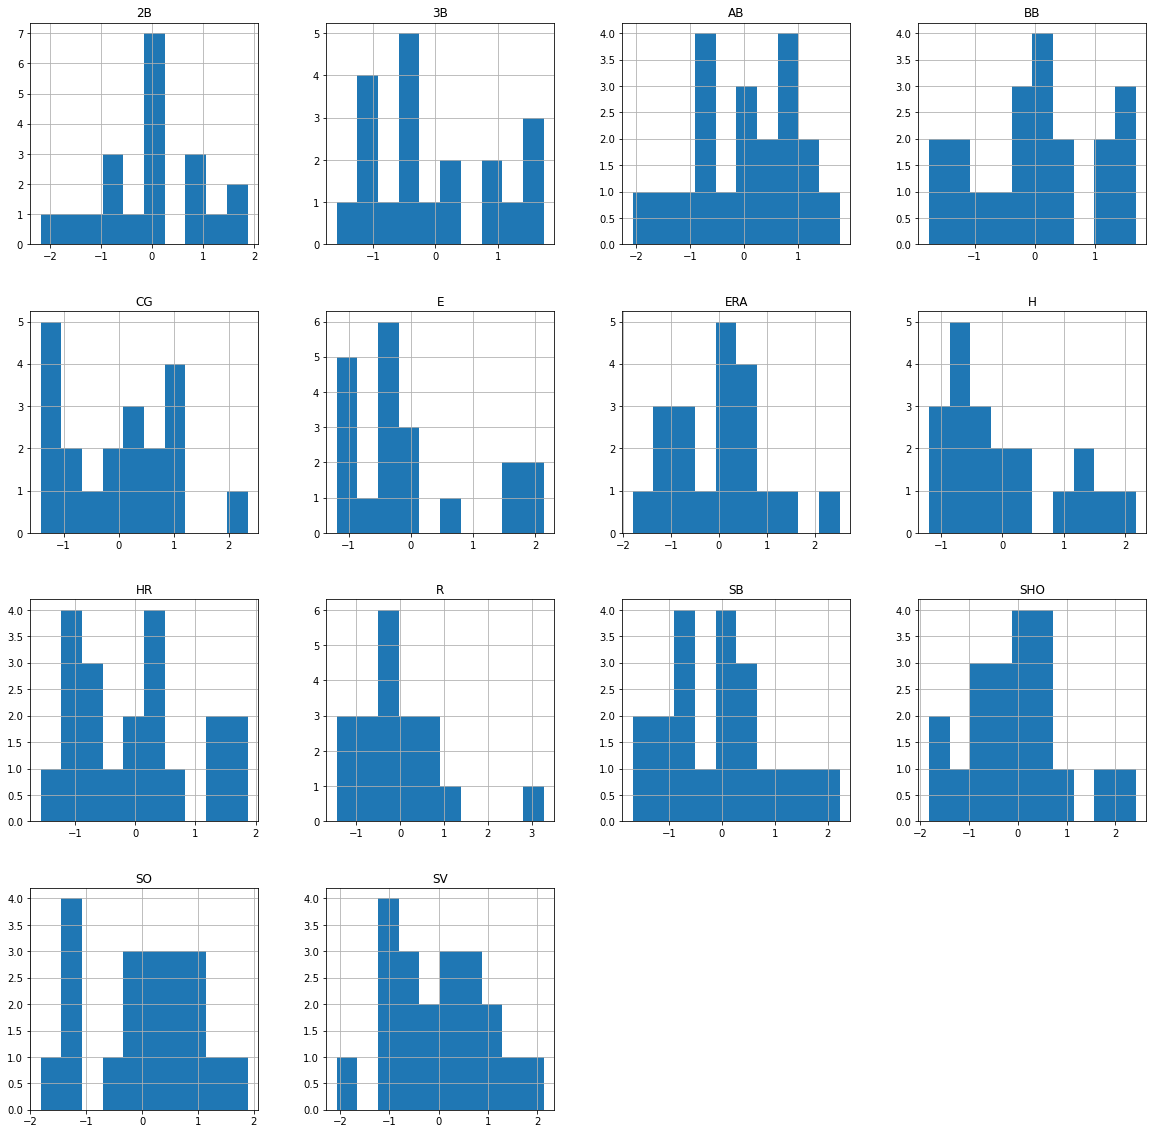

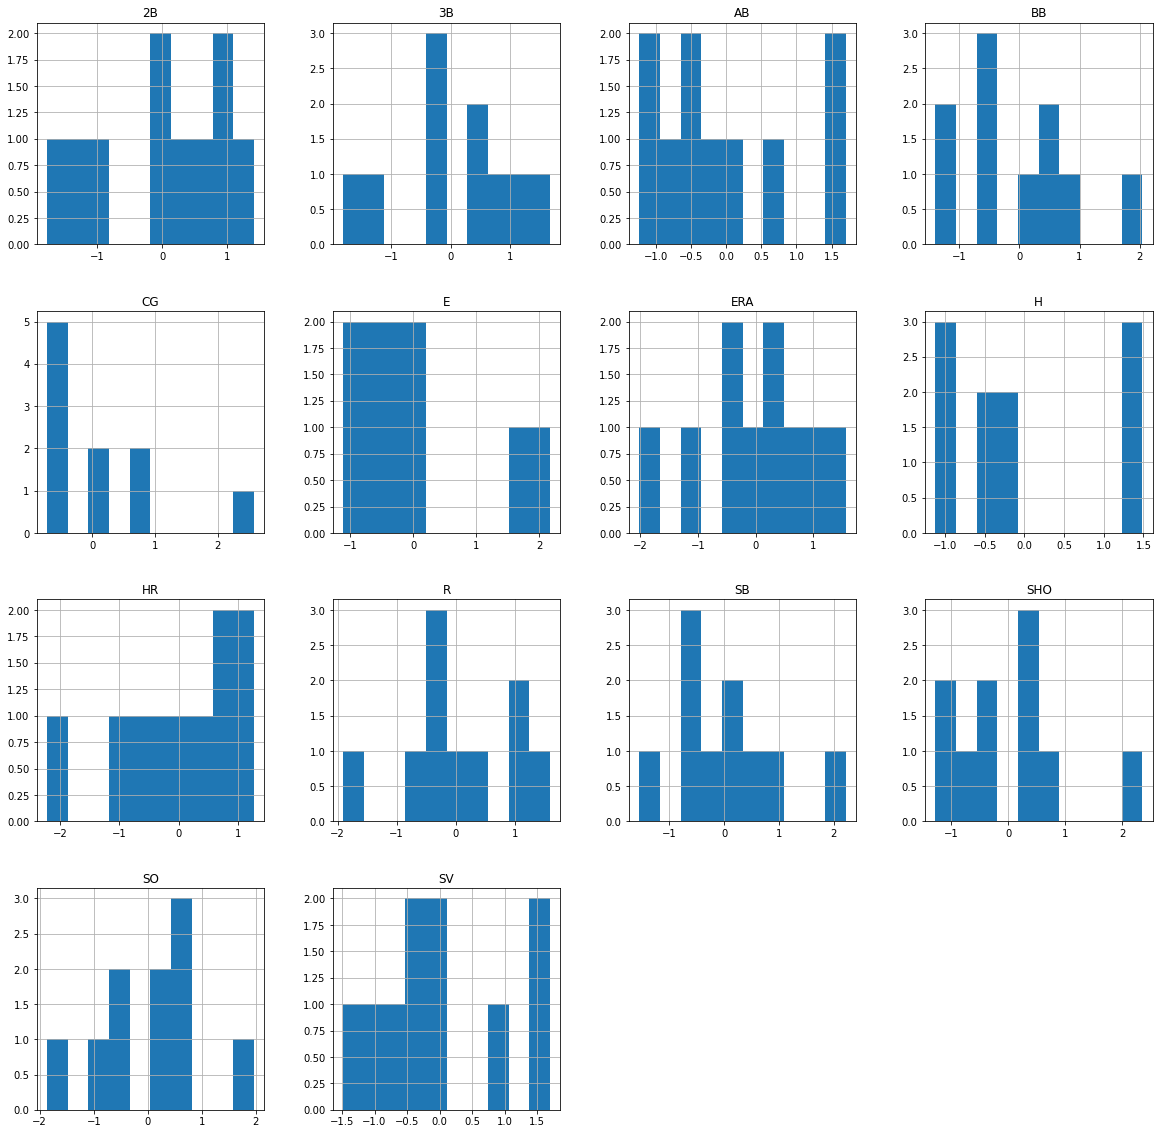

In [23]:
# Import Standard scaler

dataframes_test_train = [X_train, X_test] #already declared in one of the previous step

from sklearn.preprocessing import StandardScaler # converting the data into a standard Normal distribution
std_scaler = StandardScaler()

for dataframe in dataframes_test_train:
    data = pd.DataFrame(std_scaler.fit_transform(dataframe), columns = dataframe.columns)
    data.hist(figsize=(20,20))
    plt.show()

In [24]:
X_train.shape, y_train.shape

((20, 14), (20, 1))

#### from the above graphs it is very clear that there are no outliers. So we will move forward for model building

In [37]:
# creating a linear regression model

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# creating a linear regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# regularized model Ridge
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

# regularized model Lasso
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
print('Score for Linear Regression model')
print("Training score = ", model_linear.score(X_train, y_train))
print("Test score = ", model_linear.score(X_test, y_test))

print('\nScore for Ridge Regression model')
print("Training Score = ",model_ridge.score(X_train, y_train))
print("Test score = ",model_ridge.score(X_test, y_test))

print('\nScore for Lasso Regression model')
print("Training Score = ",model_lasso.score(X_train, y_train))
print("Test Score = ",model_lasso.score(X_test, y_test))

Score for Linear Regression model
Training score =  0.9663533136746733
Test score =  0.8202547788401536

Score for Ridge Regression model
Training Score =  0.9484180260692795
Test score =  0.8077269555392625

Score for Lasso Regression model
Training Score =  0.9223017541480242
Test Score =  0.7112124394819102


#### Since, Ridge model gives us the best results so we will proceed with this

In [35]:
print("slope = ",model_ridge.intercept_)
print("intercepts = ",model_ridge.coef_)
print("alpha value = ", model_ridge.alpha_)


slope =  [50.2251908]
intercepts =  [[ 1.05896402e-01 -4.96200246e-03  6.81714121e-03 -6.28991638e-02
   2.34425769e-02 -4.12222464e-02 -1.30675421e-02  2.54086763e-03
   5.78251075e-03 -9.98472646e+00  6.77735453e-01  2.46456694e-01
   8.84064401e-01 -1.77791926e-02]]
alpha value =  0.1


In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'alpha':[1, 10],
    'alpha': [1e-3, 1e-2, 1e-1, 1,2,5,10,100],
}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
best_model.score(X_train,y_train)

0.9462633035929945

In [42]:
best_model.score(X_test,y_test)

0.9403857318604312

In [44]:
from sklearn.externals import joblib  

# Save the model
joblib.dump(best_model, 'baseball_2014_prediction_model.pkl')


['baseball_2014_prediction_model.pkl']